# Exercise 03 — relacionamento visual

## Carregamento dos dados

Continuaremos usando o dataset tips_clean, que já passou por uma etapa de limpeza nos exercícios anteriores.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/processed/tips_clean.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Introdução: por que visualizar relações entre variáveis?

Nos exercícios anteriores, utilizamos **covariância** e **correlação** para medir a relação entre duas variáveis quantitativas.
Essas métricas são úteis, mas possuem uma limitação importante:
👉 **elas resumem toda a relação em um único número**.

A visualização entra justamente para responder perguntas que os números sozinhos não conseguem, como:

- Existe mesmo uma tendência clara?
- Os dados estão muito espalhados?
- Existem valores fora do padrão (outliers)?
- A relação parece linear ou não?

**Ideia central deste exercício**
Gráficos não substituem métricas, mas ajudam a entender se elas fazem sentido.

## Scatter plot: o gráfico base para correlação e covariância

Quando queremos analisar a relação entre **duas variáveis quantitativas**, o gráfico mais natural é o **scatter plot (gráfico de dispersão)**.

**Por que o scatter plot?**
- Cada ponto representa uma observação
- A posição do ponto depende das duas variáveis ao mesmo tempo
- Ele mostra **direção**, **intensidade e dispersão** da relação

**Conexão com covariância e correlação**
- Covariância e correlação analisam como os pontos “andam juntos”
- O scatter plot mostra isso visualmente

## Relação entre total da conta e gorjeta

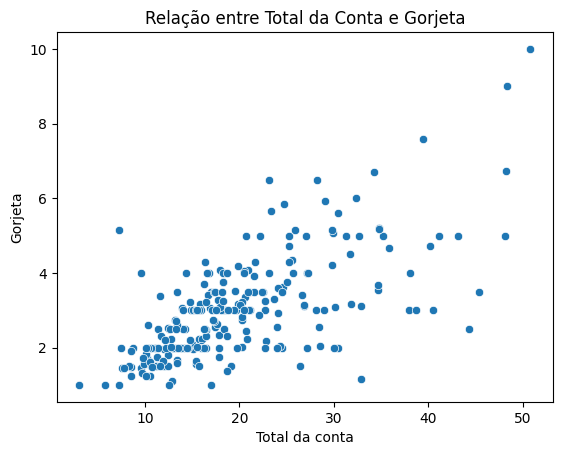

In [2]:
sns.scatterplot(data=df, x="total_bill", y="tip")
plt.title("Relação entre Total da Conta e Gorjeta")
plt.xlabel("Total da conta")
plt.ylabel("Gorjeta")
plt.show()

## Como interpretar esse gráfico?

Observe:
- Se os pontos tendem a subir da esquerda para a direita → relação positiva
- O quão espalhados os pontos estão → relação mais fraca ou mais forte
Aqui, visualmente, parece que:
- Contas maiores tendem a gerar gorjetas maiores
- Mas há bastante variação entre os valores

Isso ajuda a entender **por que a correlação não é perfeita**, mesmo sendo positiva.

## Relacionando o gráfico com a correlação numérica

Agora vamos calcular a correlação entre essas duas variáveis.

In [3]:
df[["total_bill", "tip"]].corr()

,total_bill,tip
total_bill,1.000000,0.674998
tip,0.674998,1.000000


## O que estamos fazendo aqui?

- A correlação resume o padrão visual do gráfico em um número
- O scatter plot ajuda a **validar visualmente** esse número

**Regra prática importante**

Nunca confie totalmente em um valor de correlação sem olhar o gráfico.

## Scatter plot com linha de tendência

Para facilitar a visualização da **direção média** da relação, podemos adicionar uma linha de tendência.

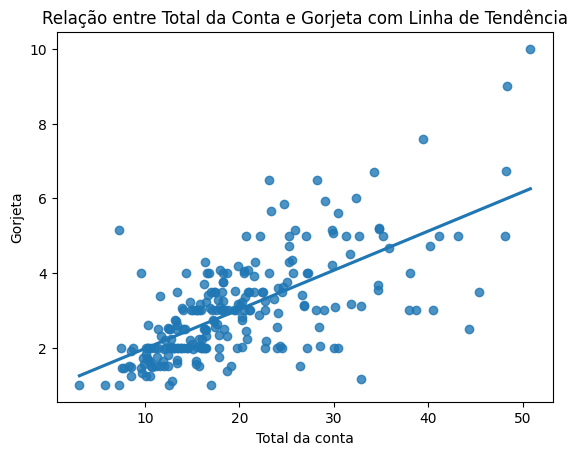

In [4]:
sns.regplot(data=df, x="total_bill", y="tip", ci=None)
plt.title("Relação entre Total da Conta e Gorjeta com Linha de Tendência")
plt.xlabel("Total da conta")
plt.ylabel("Gorjeta")
plt.show()

### Por que usar esse gráfico?

- A linha ajuda o olho humano a perceber a tendência geral
- Ela deixa clara a **direção da relação**, que é exatamente o que a correlação mede

importante:
- Essa linha **não é usada aqui para previsão**
- Ela serve apenas como apoio visual

## Relação entre total da conta e tamanho da mesa

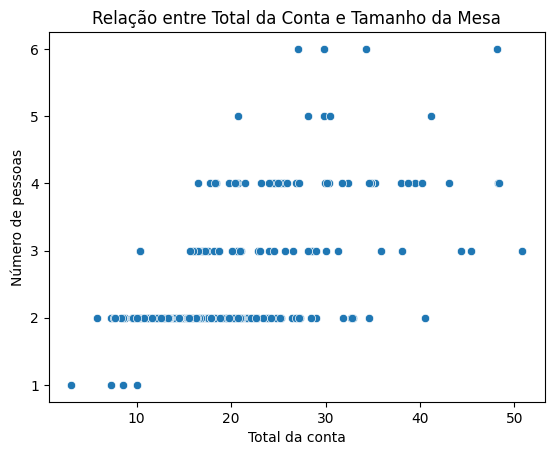

In [5]:
sns.scatterplot(data=df, x="total_bill", y="size")
plt.title("Relação entre Total da Conta e Tamanho da Mesa")
plt.xlabel("Total da conta")
plt.ylabel("Número de pessoas")
plt.show()

### Observações importantes:

- A variável `size` é discreta (valores inteiros)
- Isso cria “faixas” horizontais no gráfico
- Mesmo assim, o scatter plot continua sendo adequado

**Ligação com correlação**
Mesmo quando a correlação é positiva:
- A relação pode não ser muito forte
- O gráfico ajuda a perceber isso rapidamente

## Relação entre gorjeta e tamanho da mesa

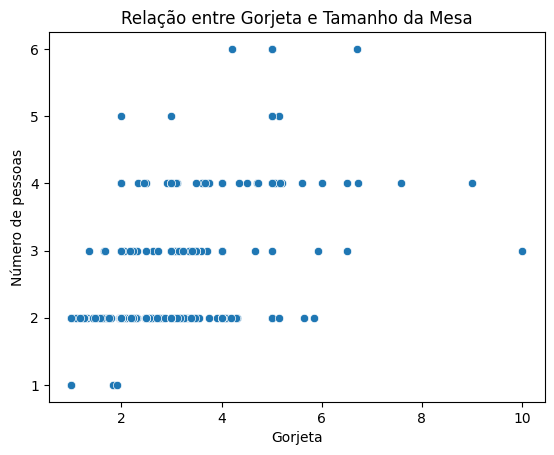

In [6]:
sns.scatterplot(data=df, x="tip", y="size")
plt.title("Relação entre Gorjeta e Tamanho da Mesa")
plt.xlabel("Gorjeta")
plt.ylabel("Número de pessoas")
plt.show()

Aqui o gráfico costuma mostrar:
- Uma relação mais fraca
- Muitos pontos espalhados
- Pouca tendência clara

Esse é um ótimo exemplo de:
Correlação próxima de zero não significa ausência de dados, mas ausência de padrão linear.

## Quando o número pode enganar

Um dos principais motivos para usar gráficos é que:
- Relações **não lineares**
- Outliers
- Agrupamentos escondidos
podem **distorcer a correlação**.

O scatter plot ajuda a responder:
- A relação parece realmente linear?
- Existe algum ponto muito fora do padrão?
- O padrão é consistente ao longo dos dados?

**Mensagem importante**

Correlação mede apenas relação linear.

O gráfico mostra a história completa.

## Conclusão do exercício

Neste exercício, aprendemos que:
- Visualização é parte essencial da análise exploratória
- Scatter plots são a base para entender covariância e correlação
- Métricas resumem, gráficos explicam
- A correlação só faz sentido quando interpretada junto ao gráfico

**Principal aprendizado**

Antes de confiar em um número, olhe para os dados.